In [203]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from tabulate import tabulate



In [204]:
def create_lag_df(yf_name):   #input as string
    stock = yf.Ticker(yf_name)
    df = stock.history('6mo')
    df_exp = df[['Close']]
    # print(df_exp)

    for i in range(1,30+1):
        df_exp[f'Close_lag{i}d'] = df_exp['Close'].shift(i) #next i day
    df_exp = df_exp.dropna()
    # print(df_exp)
    return df_exp

#col to remove
def remove_col(lag_df, days_no):
    col_to_remove = []
    for i in range(1,days_no+1):
        col_to_remove.append(f"Close_lag{i}d")
    df_dropped = lag_df.drop(col_to_remove, axis=1)
    return df_dropped

def create_label_feature_df(df_dropped):
    df_features = df_dropped.drop('Close', axis=1)
    df_label = pd.DataFrame(df_dropped['Close'])
    return df_features, df_label

def split(df_features, df_label, test_size):
    row_no = df_features.shape[0]
    train_row_no = round(row_no*(1.0-test_size))
    print(row_no)

    X_train = df_features.iloc[:train_row_no, :]
    X_test  = df_features.iloc[train_row_no:row_no, :]
    y_train = df_label.iloc[:train_row_no, :]
    y_test  = df_label.iloc[train_row_no:row_no, :]
    return X_train, X_test, y_train, y_test

# yf_name = "AAPL"
# yf_name = "^GSPC"
yf_name = "BTC-USD"
# yf_name = "AXON"
#feature for training
lag_df = create_lag_df(yf_name)
df_dropped = remove_col(lag_df,7)
X, y = create_label_feature_df(df_dropped)
X_train, X_test, y_train, y_test = split(X, y,0.2)
date_df = lag_df.index
lag_df

154


C:\Users\Norapath Arjanurak\AppData\Local\Temp\ipykernel_16424\3036575753.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_exp[f'Close_lag{i}d'] = df_exp['Close'].shift(i) #next i day
C:\Users\Norapath Arjanurak\AppData\Local\Temp\ipykernel_16424\3036575753.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_exp[f'Close_lag{i}d'] = df_exp['Close'].shift(i) #next i day
C:\Users\Norapath Arjanurak\AppData\Local\Temp\ipykernel_16424\3036575753.py:8: SettingWithCopyWarning: 
A value is trying to be set

,Close,Close_lag1d,Close_lag2d,Close_lag3d,Close_lag4d,Close_lag5d,Close_lag6d,Close_lag7d,Close_lag8d,Close_lag9d,...,Close_lag21d,Close_lag22d,Close_lag23d,Close_lag24d,Close_lag25d,Close_lag26d,Close_lag27d,Close_lag28d,Close_lag29d,Close_lag30d
Date,,,,,,,,,,,,,,,,,,,,,
2024-07-14 00:00:00+00:00,60787.792969,59231.953125,57899.464844,57344.914062,57742.496094,58009.226562,56705.097656,55849.109375,58303.539062,56662.375000,...,63180.796875,64252.578125,64096.199219,64828.656250,64960.296875,65140.746094,66490.296875,66639.046875,66191.000000,66011.093750
2024-07-15 00:00:00+00:00,64870.152344,60787.792969,59231.953125,57899.464844,57344.914062,57742.496094,58009.226562,56705.097656,55849.109375,58303.539062,...,60277.414062,63180.796875,64252.578125,64096.199219,64828.656250,64960.296875,65140.746094,66490.296875,66639.046875,66191.000000
2024-07-16 00:00:00+00:00,65097.148438,64870.152344,60787.792969,59231.953125,57899.464844,57344.914062,57742.496094,58009.226562,56705.097656,55849.109375,...,61804.640625,60277.414062,63180.796875,64252.578125,64096.199219,64828.656250,64960.296875,65140.746094,66490.296875,66639.046875
2024-07-17 00:00:00+00:00,64118.792969,65097.148438,64870.152344,60787.792969,59231.953125,57899.464844,57344.914062,57742.496094,58009.226562,56705.097656,...,60811.277344,61804.640625,60277.414062,63180.796875,64252.578125,64096.199219,64828.656250,64960.296875,65140.746094,66490.296875
2024-07-18 00:00:00+00:00,63974.066406,64118.792969,65097.148438,64870.152344,60787.792969,59231.953125,57899.464844,57344.914062,57742.496094,58009.226562,...,61604.800781,60811.277344,61804.640625,60277.414062,63180.796875,64252.578125,64096.199219,64828.656250,64960.296875,65140.746094
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-10 00:00:00+00:00,96675.429688,97432.718750,101236.015625,99923.335938,99920.710938,96593.570312,98768.531250,96002.164062,95865.304688,97279.789062,...,92343.789062,90542.640625,89845.851562,90558.476562,91066.007812,87250.429688,90584.164062,87955.812500,88701.484375,80474.187500
2024-12-11 00:00:00+00:00,101173.031250,96675.429688,97432.718750,101236.015625,99923.335938,99920.710938,96593.570312,98768.531250,96002.164062,95865.304688,...,94339.492188,92343.789062,90542.640625,89845.851562,90558.476562,91066.007812,87250.429688,90584.164062,87955.812500,88701.484375
2024-12-12 00:00:00+00:00,100043.000000,101173.031250,96675.429688,97432.718750,101236.015625,99923.335938,99920.710938,96593.570312,98768.531250,96002.164062,...,98504.726562,94339.492188,92343.789062,90542.640625,89845.851562,90558.476562,91066.007812,87250.429688,90584.164062,87955.812500


In [205]:
print(X.shape)
print(y.shape)

(154, 23)
(154, 1)


In [206]:
# Split data into training and testing sets
split_index = int(0.8 * len(X))
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]


In [207]:
# Decision Tree Regression
tree_model = DecisionTreeRegressor(max_depth=5, random_state=42)  # Adjust max_depth for complexity
tree_model.fit(X_train, y_train)


DecisionTreeRegressor(max_depth=5, random_state=42)

In [208]:
# Predictions
y_pred_train = tree_model.predict(X_train)
y_pred_test = tree_model.predict(X_test)


In [209]:
# Evaluate
print("Training MSE:", mean_squared_error(y_train, y_pred_train))
print("Testing MSE:", mean_squared_error(y_test, y_pred_test))
print("Training R2:", r2_score(y_train, y_pred_train))
print("Testing R2:", r2_score(y_test, y_pred_test))


Training MSE: 4899016.816417353
Testing MSE: 59687318.111030824
Training R2: 0.8789492884017474
Testing R2: -3.2696214618262642


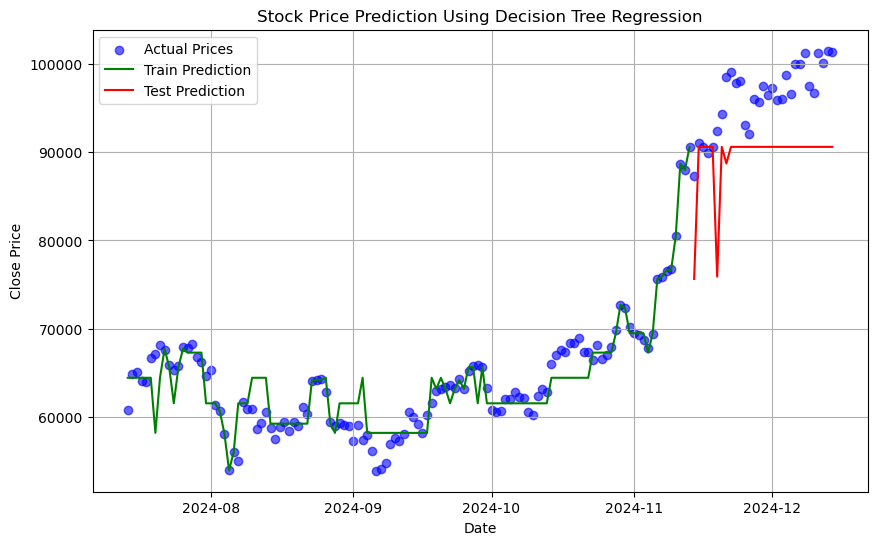

In [210]:
# Visualization
plt.figure(figsize=(10, 6))
plt.scatter(date_df, y, label='Actual Prices', color='blue', alpha=0.6)
plt.plot(date_df[:split_index], y_pred_train, label='Train Prediction', color='green')
plt.plot(date_df[split_index:], y_pred_test, label='Test Prediction', color='red')
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.title("Stock Price Prediction Using Decision Tree Regression")
plt.legend()
plt.grid(True)
plt.show()

In [211]:
from sklearn.model_selection import cross_val_score, train_test_split, ParameterGrid, KFold, cross_val_predict
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import numpy as np

Hyperparameter tuning

In [220]:

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, ParameterGrid, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import numpy as np

# Initialize models and hyperparameter ranges for regression
models = {
    'LinearRegression': (LinearRegression(), {}),
    'DecisionTreeRegressor': (DecisionTreeRegressor(random_state=42), {'max_depth': [None, 5, 10, 15]}),
    'RandomForestRegressor': (RandomForestRegressor(random_state=42), {'n_estimators': [10, 50, 100], 'max_depth': [None, 5, 10, 15]}),
    'SVR': (SVR(), {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}),
}

iteration_results = []  # To store detailed iteration results
n_splits = 10
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Define scoring metrics
scoring_metrics = ['neg_mean_squared_error', 'neg_mean_absolute_error', 'r2']

# Perform k-fold cross-validation for each model
for name, (model, params) in models.items():
    print(f"\nEvaluating Model: {name}")

    # Loop over each hyperparameter combination
    for param_combination in ParameterGrid(params):
        # Set parameters for the current model
        model.set_params(**param_combination)

        # Create a pipeline with a StandardScaler and the model
        pipeline = Pipeline([
            ('scaler', StandardScaler()),
            ('model', model)
        ])

        # Perform cross-validation for each metric
        cv_scores = {}
        for metric in scoring_metrics:
            cv_scores[metric] = cross_val_score(pipeline, X_train, y_train, cv=kf, scoring=metric, n_jobs=-1)

        # Calculate mean scores for each metric
        mean_cv_mse = -np.mean(cv_scores['neg_mean_squared_error'])  # Convert to positive MSE
        mean_cv_mae = -np.mean(cv_scores['neg_mean_absolute_error'])  # Convert to positive MAE
        mean_cv_r2 = np.mean(cv_scores['r2'])

        # Store iteration results
        iteration_results.append([
            name,
            param_combination,
            round(mean_cv_mse, 4),
            round(mean_cv_mae, 4),
            round(mean_cv_r2, 4)
        ])

# Display the results as a table using tabulate
headers = ["Model", "Parameters", "MSE", "MAE", "R²"]
print("\nSummary of Cross-Validation Results:")
print(tabulate(iteration_results, headers=headers, tablefmt="grid"))

# Export results to CSV
output_csv = "model_results.csv"
df_results = pd.DataFrame(iteration_results, columns=["Model", "Parameters", "MSE", "MAE", "R²"])
df_results.to_csv(output_csv, index=False)

print(f"\nResults exported to {output_csv}")

# Find the best models for each metric
best_mse_row = df_results.loc[df_results['MSE'].idxmin()]
best_mae_row = df_results.loc[df_results['MAE'].idxmin()]
best_r2_row = df_results.loc[df_results['R²'].idxmax()]

# Display the best models and parameters for each metric
best_models_summary = [
    ["MSE", best_mse_row["Model"], best_mse_row["Parameters"], best_mse_row["MSE"]],
    ["MAE", best_mae_row["Model"], best_mae_row["Parameters"], best_mae_row["MAE"]],
    ["R²", best_r2_row["Model"], best_r2_row["Parameters"], best_r2_row["R²"]]
]

headers = ["Metric", "Best Model", "Best Parameters", "Score"]
print("\nBest Models for Each Metric:")
print(tabulate(best_models_summary, headers=headers, tablefmt="grid"))

# Store the best models for each metric in a list
best_models_data = [
    ["MSE", best_mse_model, model_results[best_mse_model]['Best Parameters'], model_results[best_mse_model]['Best Cross-Validation MSE']],
    ["MAE", best_mae_model, model_results[best_mae_model]['Best Parameters'], model_results[best_mae_model]['Best Cross-Validation MAE']],
    ["R²", best_r2_model, model_results[best_r2_model]['Best Parameters'], model_results[best_r2_model]['Best Cross-Validation R2']]
]

# Export best models to CSV
best_models_df = pd.DataFrame(best_models_data, columns=headers)
best_models_df.to_csv("best_models_summary.csv", index=False)


Evaluating Model: LinearRegression

Evaluating Model: DecisionTreeRegressor

Evaluating Model: RandomForestRegressor

Evaluating Model: SVR

Summary of Cross-Validation Results:
+-----------------------+------------------------------------------+-------------+---------+---------+
| Model                 | Parameters                               |         MSE |     MAE |      R² |
+=======================+==========================================+=============+=========+=========+
| LinearRegression      | {}                                       | 2.80811e+07 | 4180.86 | -0.1315 |
+-----------------------+------------------------------------------+-------------+---------+---------+
| DecisionTreeRegressor | {'max_depth': None}                      | 2.13461e+07 | 3174.83 |  0.211  |
+-----------------------+------------------------------------------+-------------+---------+---------+
| DecisionTreeRegressor | {'max_depth': 5}                         | 1.85124e+07 | 3029.7  |  0.2786

Predict the train and test dataset with the best parameters

In [213]:
best_models = model_results.copy()

# Dictionary to store predictions from all models
model_predictions = {}
model_training_predictions = {}

# Generate models with their best hyperparameters
for name, (model_class, _) in models.items():
    best_params = model_results[name]['Best Parameters']
    
    # Instantiate the model with its best parameters
    if name == 'LinearRegression':
        best_models[name] = LinearRegression(**best_params)
    elif name == 'DecisionTreeRegressor':
        best_models[name] = DecisionTreeRegressor(random_state=42, **best_params)
    elif name == 'RandomForestRegressor':
        best_models[name] = RandomForestRegressor(random_state=42, **best_params)
    elif name == 'SVR':
        best_models[name] = SVR(**best_params)

# Fit all models on the training data and make predictions
for name, model in best_models.items():
    model.fit(X_train, y_train)
    
    # Generate predictions for both training and testing sets
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)
    
    # Store predictions
    model_training_predictions[name] = train_predictions
    model_predictions[name] = test_predictions

c:\Users\Norapath Arjanurak\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\Norapath Arjanurak\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Plot the result as visualization

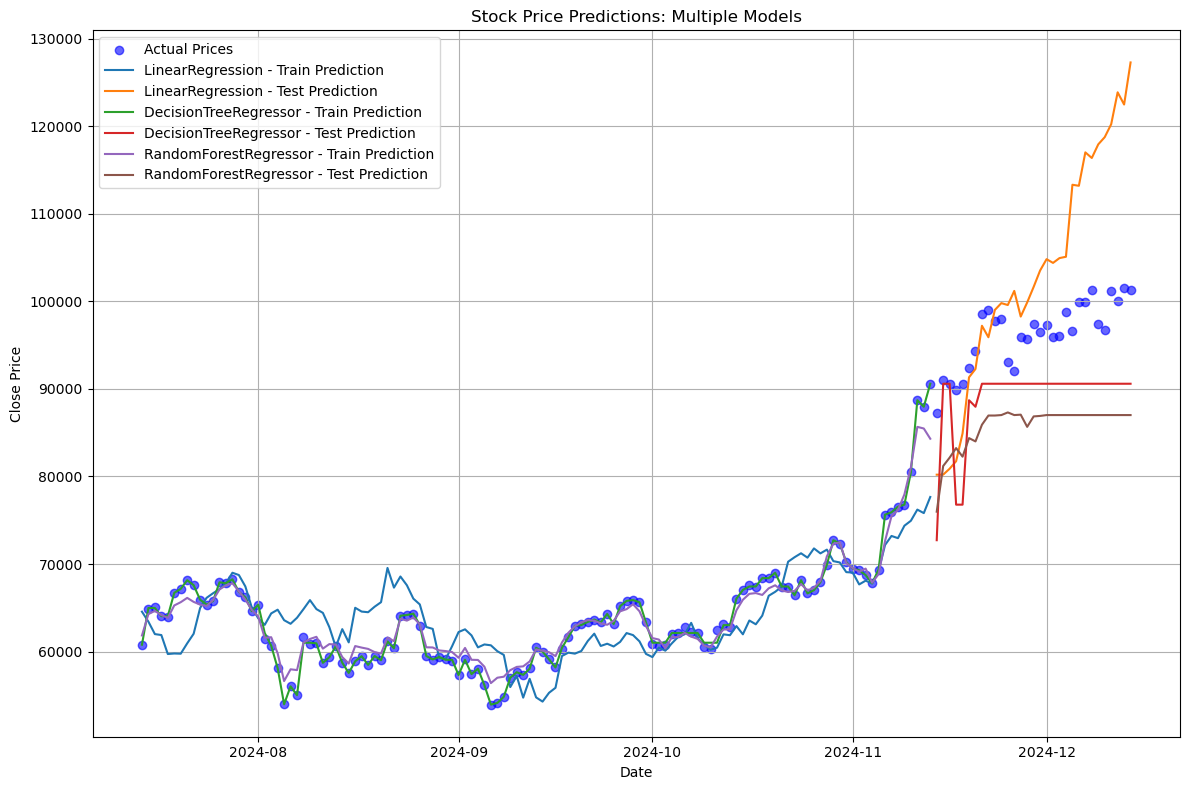

In [214]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
# Plot actual prices
plt.scatter(date_df, y, label=f'Actual Prices', color='blue', alpha=0.6)
# Iterate over models and their results
for model_name, model_result in model_results.items():
    if model_name != 'SVR':
        y_pred_train = model_training_predictions.get(model_name, [0] * split_index)  
        y_pred_test = model_predictions.get(model_name, [0] * (len(date_df) - split_index))  
        # Plot train predictions
        plt.plot(date_df[:split_index], y_pred_train, label=f'{model_name} - Train Prediction')
        # Plot test predictions
        plt.plot(date_df[split_index:], y_pred_test, label=f'{model_name} - Test Prediction')
        # Add labels and titles
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.title("Stock Price Predictions: Multiple Models")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



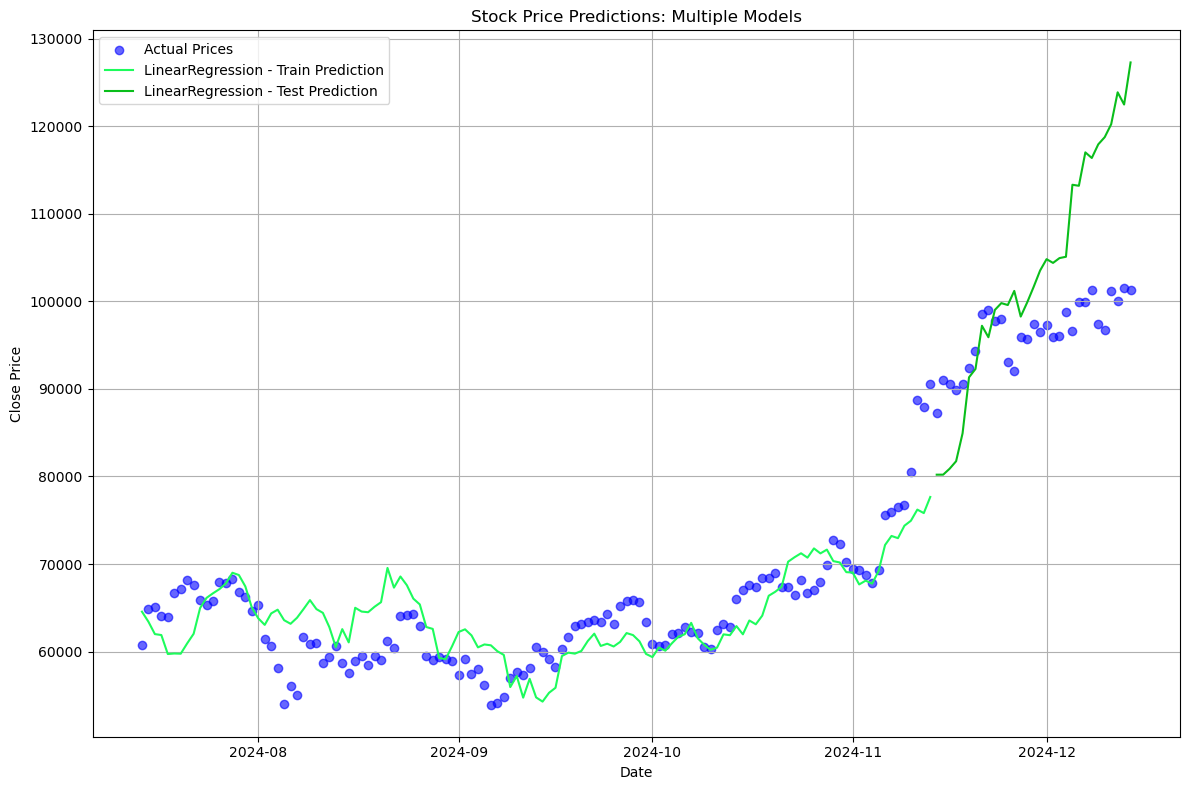

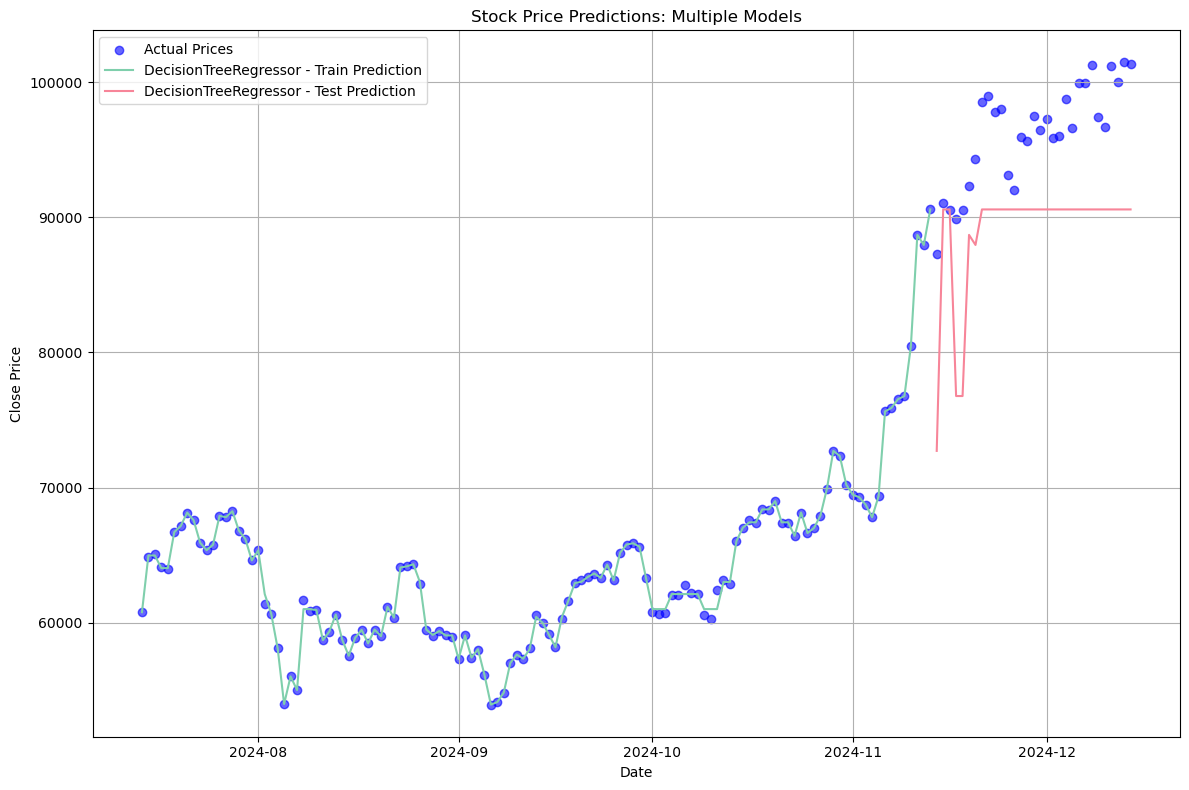

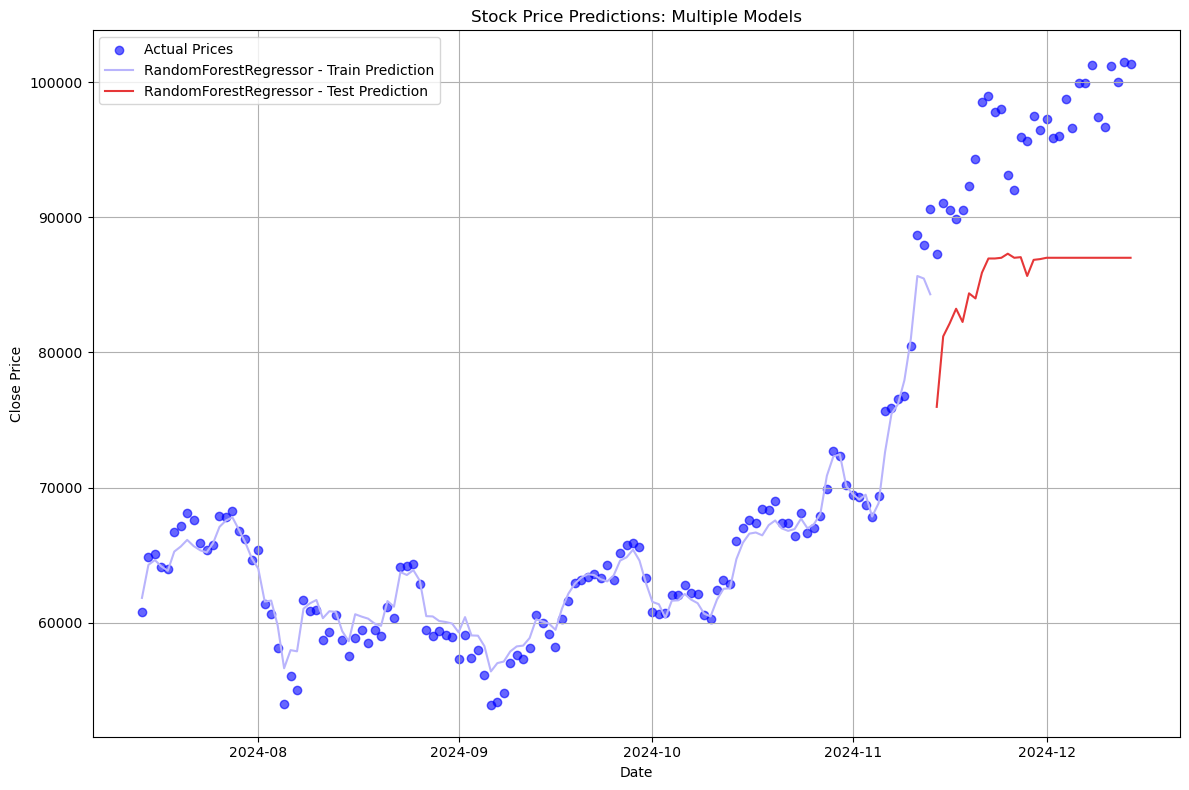

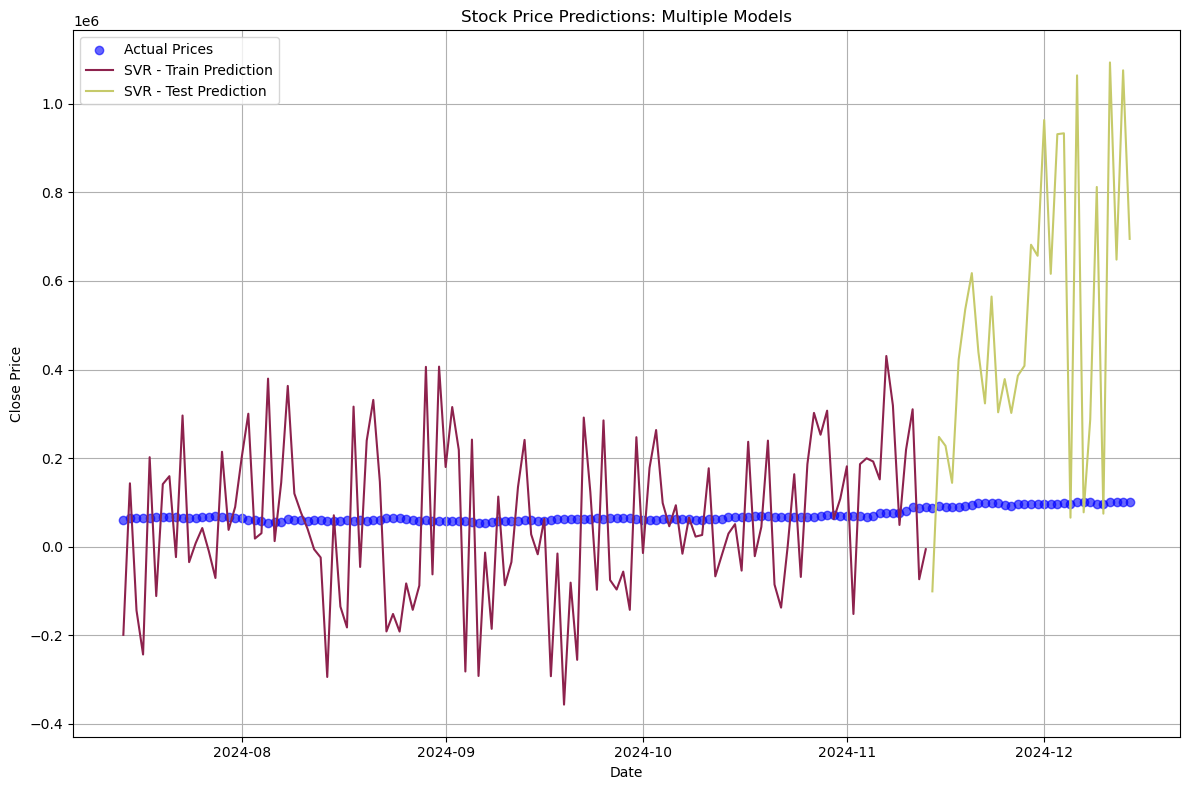

In [215]:
import matplotlib.pyplot as plt
import random

# Generate random color
def random_color():
    return [random.random() for _ in range(3)]  # RGB values between 0 and 1

# Iterate over models and their results
for model_name, model_result in model_results.items():
    if model_name != 'test':
        plt.figure(figsize=(12, 8))
        plt.scatter(date_df, y, label=f'Actual Prices', color='blue', alpha=0.6)
        
        y_pred_train = model_training_predictions.get(model_name, [0] * split_index)  
        y_pred_test = model_predictions.get(model_name, [0] * (len(date_df) - split_index))  
        
        plt.plot(
            date_df[:split_index],
            y_pred_train,
            label=f'{model_name} - Train Prediction',
            color=random_color()
        )
        
        plt.plot(
            date_df[split_index:], 
            y_pred_test, 
            label=f'{model_name} - Test Prediction',
            color=random_color()
        )
        
        # Add labels and titles
        plt.xlabel("Date")
        plt.ylabel("Close Price")
        plt.title("Stock Price Predictions: Multiple Models")
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()


Evaluate each model with the predict from train and test prediction

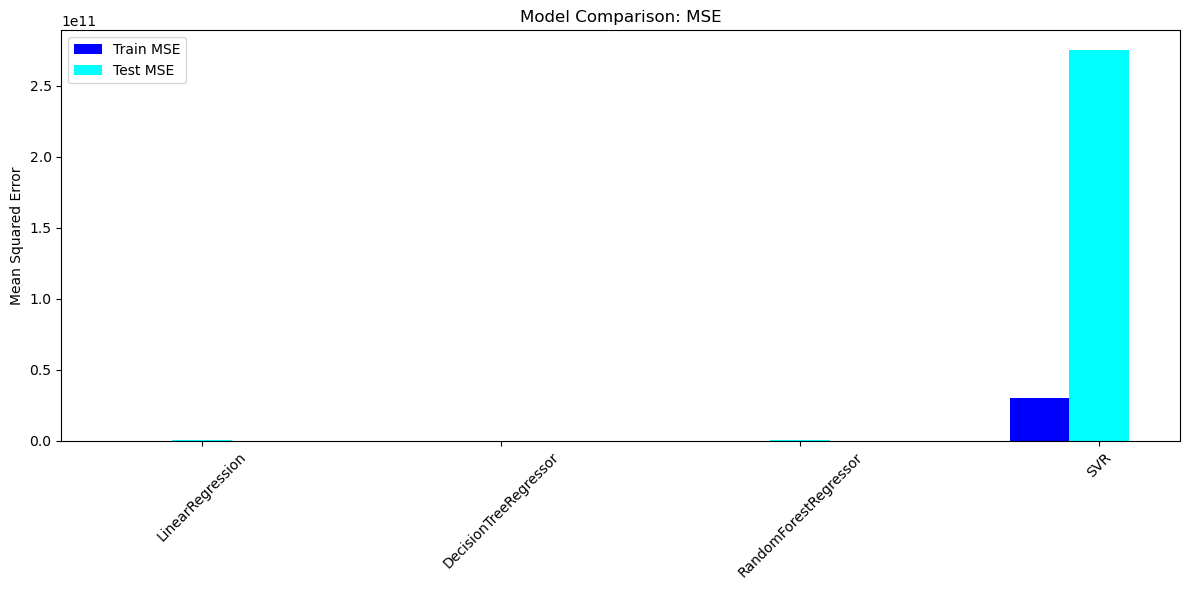

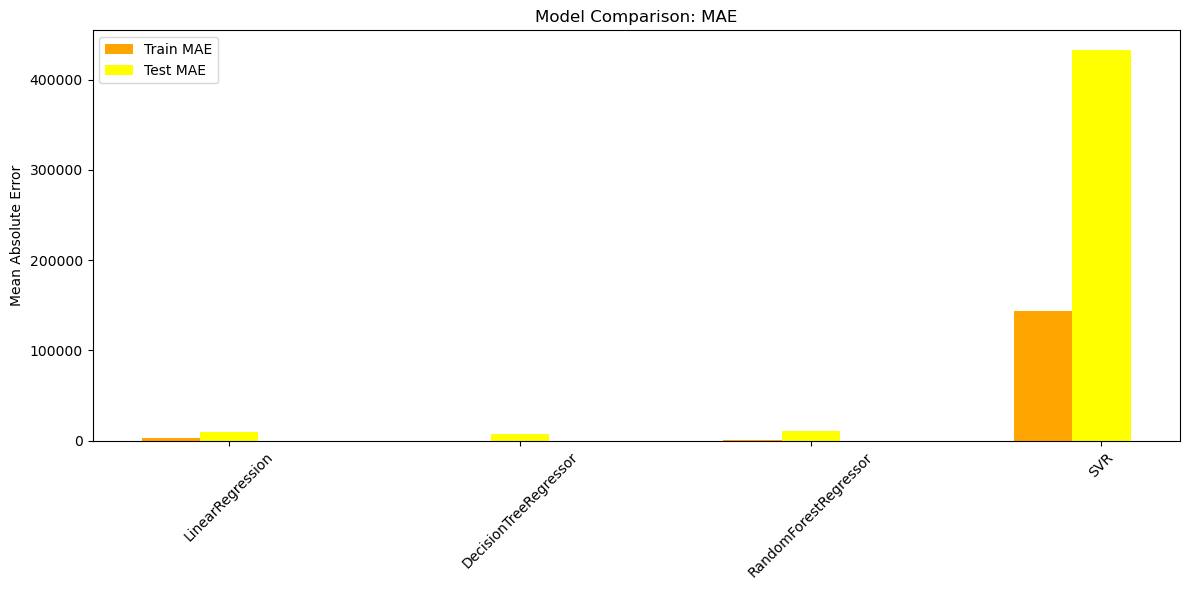

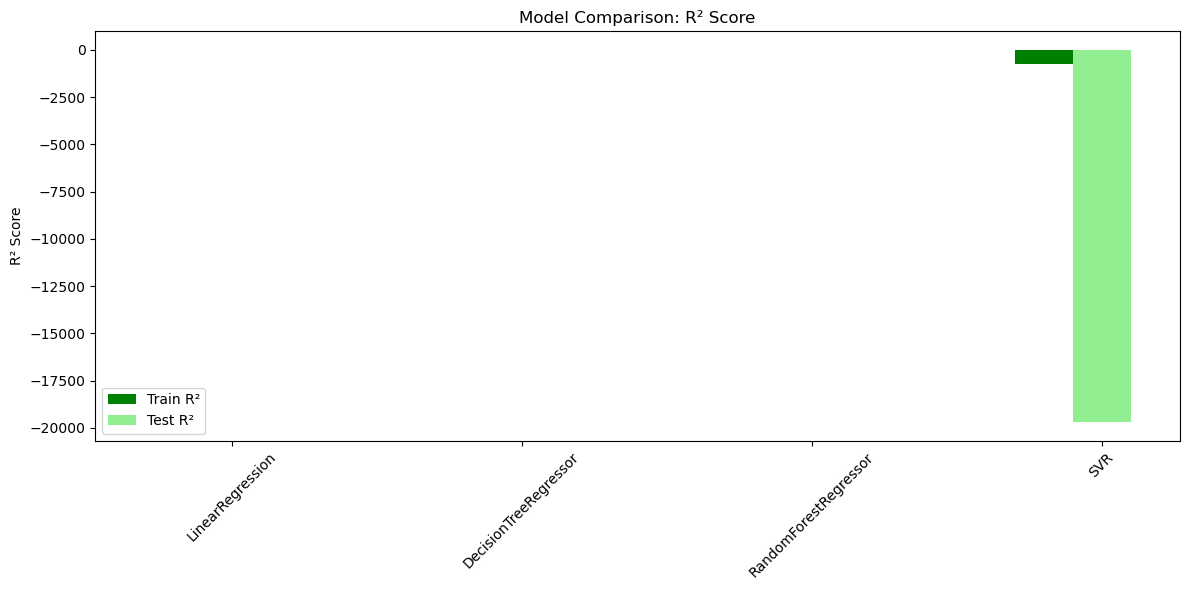


Best Metrics on Training Data:
Best MSE: 38932.2473 (Model: DecisionTreeRegressor, Parameters: {'max_depth': 10})
Best MAE: 65.6922 (Model: DecisionTreeRegressor, Parameters: {'max_depth': 10})
Best R²: 0.9990 (Model: DecisionTreeRegressor, Parameters: {'max_depth': 10})

Best Metrics on Test Data:
Best MSE: 65243605.6310 (Model: DecisionTreeRegressor, Parameters: {'max_depth': 10})
Best MAE: 7272.9965 (Model: DecisionTreeRegressor, Parameters: {'max_depth': 10})
Best R²: -3.6671 (Model: DecisionTreeRegressor, Parameters: {'max_depth': 10})


In [216]:
import matplotlib.pyplot as plt
import tabulate

# Dictionary to store comparison results
comparison_results = []
best_mse_train = float('inf')
best_mae_train = float('inf')
best_r2_train = -float('inf')
best_mse_test = float('inf')
best_mae_test = float('inf')
best_r2_test = -float('inf')
best_mse_model_train = None
best_mae_model_train = None
best_r2_model_train = None
best_mse_model_test = None
best_mae_model_test = None
best_r2_model_test = None

# Iterate over all models to calculate metrics for both training and testing
for model_name in model_predictions.keys():
    train_predictions = model_training_predictions[model_name]
    test_predictions = model_predictions[model_name]
    
    # Calculate metrics for training and testing predictions
    train_mse = mean_squared_error(y_train, train_predictions)
    train_mae = mean_absolute_error(y_train, train_predictions)
    train_r2 = r2_score(y_train, train_predictions)
    test_mse = mean_squared_error(y_test, test_predictions)
    test_mae = mean_absolute_error(y_test, test_predictions)
    test_r2 = r2_score(y_test, test_predictions)
    
    # Update the best metrics for training and testing
    if train_mse < best_mse_train:
        best_mse_train = train_mse
        best_mse_model_train = model_name
    if train_mae < best_mae_train:
        best_mae_train = train_mae
        best_mae_model_train = model_name
    if train_r2 > best_r2_train:
        best_r2_train = train_r2
        best_r2_model_train = model_name
    if test_mse < best_mse_test:
        best_mse_test = test_mse
        best_mse_model_test = model_name
    if test_mae < best_mae_test:
        best_mae_test = test_mae
        best_mae_model_test = model_name
    if test_r2 > best_r2_test:
        best_r2_test = test_r2
        best_r2_model_test = model_name
    
    # Append results for the table
    comparison_results.append([
        model_name,
        model_results[model_name]['Best Parameters'],
        train_mse, train_mae, train_r2,
        test_mse, test_mae, test_r2
    ])

# Print the comparison results as a table
headers = [
    "Model", "Best Parameters",
    "Train MSE", "Train MAE", "Train R²",
    "Test MSE", "Test MAE", "Test R²"
]
# print(tabulate(comparison_results, headers=headers, tablefmt="grid"))
# Extract metrics for visualization
models = [result[0] for result in comparison_results]
train_mse = [float(result[2]) for result in comparison_results]
train_mae = [float(result[3]) for result in comparison_results]
train_r2 = [float(result[4]) for result in comparison_results]
test_mse = [float(result[5]) for result in comparison_results]
test_mae = [float(result[6]) for result in comparison_results]
test_r2 = [float(result[7]) for result in comparison_results]

# Bar width for grouped bar chart
bar_width = 0.2
indices = np.arange(len(models))

# Plot MSE comparison
plt.figure(figsize=(12, 6))
plt.bar(indices - bar_width, train_mse, bar_width, label='Train MSE', color='blue')
plt.bar(indices, test_mse, bar_width, label='Test MSE', color='cyan')
plt.xticks(indices, models, rotation=45)
plt.ylabel('Mean Squared Error')
plt.title('Model Comparison: MSE')
plt.legend()
plt.tight_layout()
plt.show()

# Plot MAE comparison
plt.figure(figsize=(12, 6))
plt.bar(indices - bar_width, train_mae, bar_width, label='Train MAE', color='orange')
plt.bar(indices, test_mae, bar_width, label='Test MAE', color='yellow')
plt.xticks(indices, models, rotation=45)
plt.ylabel('Mean Absolute Error')
plt.title('Model Comparison: MAE')
plt.legend()
plt.tight_layout()
plt.show()

# Plot R² comparison
plt.figure(figsize=(12, 6))
plt.bar(indices - bar_width, train_r2, bar_width, label='Train R²', color='green')
plt.bar(indices, test_r2, bar_width, label='Test R²', color='lightgreen')
plt.xticks(indices, models, rotation=45)
plt.ylabel('R² Score')
plt.title('Model Comparison: R² Score')
plt.legend()
plt.tight_layout()
plt.show()

# Print the best metrics along with their parameters
print("\nBest Metrics on Training Data:")
print(f"Best MSE: {best_mse_train:.4f} (Model: {best_mse_model_train}, Parameters: {model_results[best_mse_model_train]['Best Parameters']})")
print(f"Best MAE: {best_mae_train:.4f} (Model: {best_mae_model_train}, Parameters: {model_results[best_mae_model_train]['Best Parameters']})")
print(f"Best R²: {best_r2_train:.4f} (Model: {best_r2_model_train}, Parameters: {model_results[best_r2_model_train]['Best Parameters']})")

print("\nBest Metrics on Test Data:")
print(f"Best MSE: {best_mse_test:.4f} (Model: {best_mse_model_test}, Parameters: {model_results[best_mse_model_test]['Best Parameters']})")
print(f"Best MAE: {best_mae_test:.4f} (Model: {best_mae_model_test}, Parameters: {model_results[best_mae_model_test]['Best Parameters']})")
print(f"Best R²: {best_r2_test:.4f} (Model: {best_r2_model_test}, Parameters: {model_results[best_r2_model_test]['Best Parameters']})")


In [217]:
from tabulate import tabulate
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Initialize comparison results list
comparison_results = []

# Calculate metrics for training and testing predictions
for model_name, predictions in model_predictions.items():
    # Training predictions
    train_predictions = model_training_predictions[model_name]
    train_mse = mean_squared_error(y_train, train_predictions)
    train_mae = mean_absolute_error(y_train, train_predictions)
    train_r2 = r2_score(y_train, train_predictions)

    # Testing predictions
    test_mse = mean_squared_error(y_test, predictions)
    test_mae = mean_absolute_error(y_test, predictions)
    test_r2 = r2_score(y_test, predictions)

    # Append the row of results to the comparison table
    comparison_results.append([
        model_name,
        model_results[model_name]['Best Parameters'],
        f"{train_mse:.4f}", f"{train_mae:.4f}", f"{train_r2:.4f}",
        f"{test_mse:.4f}", f"{test_mae:.4f}", f"{test_r2:.4f}"
    ])

# Define the table headers
headers = [
    "Model",
    "Best Parameters",
    "Train MSE", "Train MAE", "Train R²",
    "Test MSE", "Test MAE", "Test R²"
]

# Display the comparison results table
print(tabulate(comparison_results, headers=headers, tablefmt="grid"))


+-----------------------+------------------------------------------+-----------------+-------------+------------+-------------+------------+-------------+
| Model                 | Best Parameters                          |       Train MSE |   Train MAE |   Train R² |    Test MSE |   Test MAE |     Test R² |
+=======================+==========================================+=================+=============+============+=============+============+=============+
| LinearRegression      | {}                                       |     1.77422e+07 |   3319.33   |     0.5616 | 1.53945e+08 |    10034.5 |    -10.0122 |
+-----------------------+------------------------------------------+-----------------+-------------+------------+-------------+------------+-------------+
| DecisionTreeRegressor | {'max_depth': 10}                        | 38932.2         |     65.6922 |     0.999  | 6.52436e+07 |     7273   |     -3.6671 |
+-----------------------+------------------------------------------+--

Lstm Time Series

In [218]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [219]:
# Generate sample time-series data
# def generate_time_series_data(n_samples, n_steps):
#     X = np.array([np.sin(0.1 * i) + 0.1 * np.random.normal() for i in range(n_samples)])
#     y = np.roll(X, -n_steps)  # Shifted target for prediction
#     return X[:-n_steps], y[:-n_steps]

# Parameters
# n_samples = 1000
# n_steps = 10

# Generate data
# X_raw, y_raw = generate_time_series_data(n_samples, n_steps)

# Reshape data for LSTM ([samples, timesteps, features])
# X = np.array([X_raw[i:i + n_steps] for i in range(len(X_raw) - n_steps)])
# y = y_raw[n_steps:]

# Normalize data
# scaler = MinMaxScaler()
# X_scaled = scaler.fit_transform(X.reshape(-1, 1)).reshape(X.shape)
# y_scaled = scaler.fit_transform(y.reshape(-1, 1)).flatten()

# # Split into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# Build LSTM model
model = Sequential([
    LSTM(50, activation='relu', input_shape=(1, 1)),
    Dense(1)
])

# Compile model
model.compile(optimizer='adam', loss='mse')

# Train model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Evaluate model
test_loss = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {test_loss:.4f}")
print(y_test.shape)
# Predict and plot results
y_pred = model.predict(X_test)
# Plot results
plt.figure(figsize=(10, 6))
plt.plot(date_df[:y_test.shape[0]], y_test, label='True', marker='o', linestyle='-', alpha=0.7)
plt.plot(date_df[:y_test.shape[0]], y_pred.flatten(), label='Predicted', marker='x', linestyle='--', alpha=0.7)
plt.xlabel("X-axis (e.g., Time or Index)")
plt.ylabel("Y-axis (Value)")
plt.legend()
plt.title("LSTM Time-Series Prediction")
plt.grid()
plt.show()


Epoch 1/50


ValueError: in user code:

    File "c:\Users\Norapath Arjanurak\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1377, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\Norapath Arjanurak\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1360, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\Norapath Arjanurak\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1349, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\Norapath Arjanurak\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1126, in train_step
        y_pred = self(x, training=True)
    File "c:\Users\Norapath Arjanurak\anaconda3\Lib\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\Norapath Arjanurak\anaconda3\Lib\site-packages\keras\src\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_5" is incompatible with the layer: expected shape=(None, 1, 1), found shape=(None, 23)
